In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import util

In [2]:
import seaborn as sns

In [27]:
df1 = pd.read_csv("machine_after_scatter.csv")

In [32]:
df1.loc[df1["signal"] < 0, "signal"] = -1
df1.loc[df1["signal"] > 0, "signal"] = 1

<IPython.core.display.Javascript object>


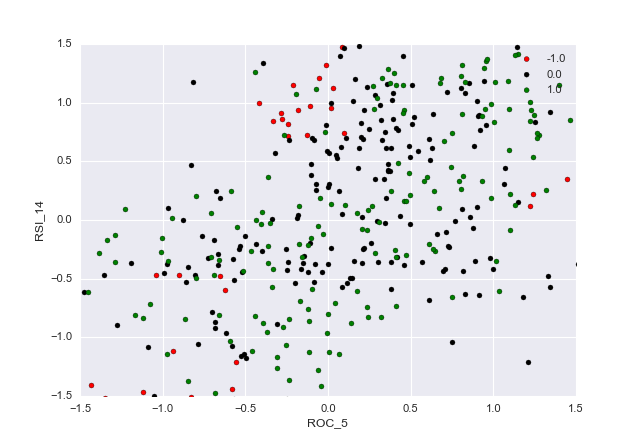

In [33]:
fig, ax = plt.subplots()

colors = {-1:'red', 0:'black', 1:'green'}
ax.set_ylim([-1.5,1.5])
ax.set_xlim([-1.5,1.5])
grouped = df1.groupby('signal')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='ROC_5', y='RSI_14', label=key, color=colors[key])

plt.show()

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


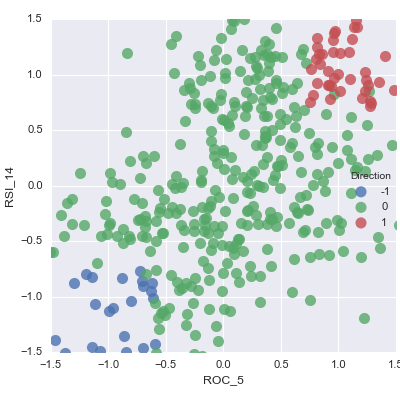

In [11]:
%pylab notebook
sns.lmplot('ROC_5', 'RSI_14',
           data=df1,
           fit_reg=False,
           hue="Direction",  
           scatter_kws={"marker": "D",
                        "s": 100}).set(xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))

In [3]:
data_train_df.head(5)

,SPY,AAPL
2008-01-02,132.15,194.01
2008-01-03,132.09,194.10
2008-01-04,128.85,179.28
2008-01-07,128.74,176.88
2008-01-08,126.66,170.52


In [4]:
class TA():
    def __init__(self, df):
        self.df = df.copy()
        
    def roc(self, lag):
        return (self.df - self.df.shift(lag)) / self.df
    
    
    def rsi(self, period=14):
        ret = (self.df - self.df.shift(1)) / self.df
        def _rsi(x):
            up = np.sum(x[x > 0])
            down = np.sum(x[x < 0])
            rs = up / abs(down)
            return 100 - 100 /(1 + rs)
        res = pd.rolling_apply(ret, period, _rsi)   
        return res
    
    def ma(self, period=5):
        return pd.rolling_mean(self.df, period)
    

In [5]:
AAPL_train_df = data_train_df[["AAPL"]]

In [6]:
ta_transfer = TA(AAPL_train_df)

In [7]:
AAPL_train_df["ROC_10"] = ta_transfer.roc(10)
AAPL_train_df["RSI_14"] = ta_transfer.rsi(14)
AAPL_train_df["MA_5"] = ta_transfer.ma(5)
AAPL_train_df["MA_20"] = ta_transfer.ma(20)
AAPL_train_df["MA_5_diff_20"] = (AAPL_train_df["MA_5"] - AAPL_train_df["MA_20"])/AAPL_train_df["AAPL"]

C:\Users\vodkabuaa\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=14,center=False).apply(kwargs=<dict>,args=<tuple>,func=<function>)
C:\Users\vodkabuaa\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=5).mean()
C:\Users\vodkabuaa\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=20).mean()


In [8]:
AAPL_train_df.to_csv("AAPL_train_df.csv")

In [9]:
AAPL_train_df.dropna(inplace=True)

In [12]:
Features = ["ROC_10", "RSI_14", "MA_5_diff_20"]
AAPL_train_feature_df = AAPL_train_df[Features]

In [13]:
AAPL_train_feature_norm_df = (AAPL_train_feature_df - AAPL_train_feature_df.mean())/ AAPL_train_feature_df.std()

In [14]:
AAPL_fig_df = AAPL_train_df / AAPL_train_df.iloc[0,:]

In [15]:
(130.98 - 138.48) / 130.98

-0.05726065048098947

In [16]:
AAPL_train_df

,AAPL,ROC_10,RSI_14,MA_5,MA_20,MA_5_diff_20
2008-01-30,131.61,-0.278930,13.888789,131.302,160.9380,-0.225180
2008-01-31,134.78,-0.179403,18.558954,131.254,157.9765,-0.198268
2008-02-01,133.18,-0.202883,19.358783,132.000,154.9305,-0.172177
2008-02-04,131.09,-0.225647,12.070817,132.328,152.5210,-0.154039
2008-02-05,128.81,-0.203090,13.340113,131.894,150.1175,-0.141476
2008-02-06,121.48,-0.139941,13.289141,129.868,147.6655,-0.146506
2008-02-07,120.72,-0.118456,11.301271,127.056,144.7700,-0.146736
2008-02-08,124.94,-0.036097,17.966248,125.408,142.1540,-0.134032
2008-02-11,128.90,-0.004267,25.830127,124.970,140.0015,-0.116614
2008-02-12,124.33,-0.053487,32.429909,124.074,137.3170,-0.106515


In [17]:
%pylab notebook
AAPL_fig_df[["AAPL","ROC_5"]].plot()

Populating the interactive namespace from numpy and matplotlib


KeyError: "['ROC_5'] not in index"

<IPython.core.display.Javascript object>


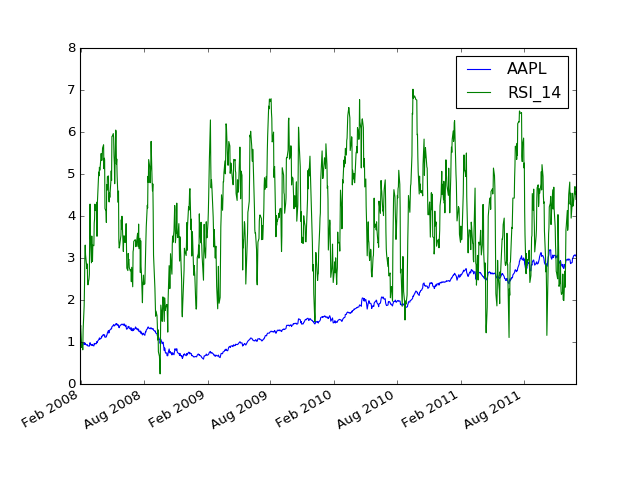

In [18]:
AAPL_fig_df[["AAPL","RSI_14"]].plot()

In [ ]:
AAPL_fig_df[["AAPL","MA_5","MA_10","MA_5_diff_10"]].plot()

In [19]:
benchmark_best_df = data_train_df[["AAPL"]].copy()
benchmark_best_df["BenchMark"] = benchmark_best_df["AAPL"] /  benchmark_best_df["AAPL"][0]

In [20]:
benchmark_best_df["BestPortfolio"] = abs(benchmark_best_df[["AAPL"]].shift(1) - benchmark_best_df[["AAPL"]]) / benchmark_best_df[["AAPL"]]
benchmark_best_df["BestPortfolio"][0] = 0

In [21]:
initial_val = 100000
bench_stock_val = benchmark_best_df["BenchMark"] * 200 *benchmark_best_df["AAPL"][0]
bench_money = initial_val - 200 *benchmark_best_df["AAPL"][0]
portfolio_benchmark = bench_stock_val + bench_money 

In [22]:
order_best = pd.DataFrame(columns=["Date","Symbol", "Order", "Shares"])

In [23]:
order_best

,Date,Symbol,Order,Shares


In [24]:
data_train_df[["return"]] = data_train_df[["AAPL"]].pct_change()
data_train_df[["return"]] = data_train_df[["return"]].shift(-1)

In [25]:
data_train_df["direction"] = 1

In [26]:
order_best["Date"] = data_train_df.index

In [ ]:
order_best["Symbol"] = "AAPL"
order_best["Shares"] = 200


In [ ]:
pos_less = data_train_df["return"] < 0
order_best.set_index("Date", inplace=True)

In [ ]:
order_best["Order"] = "Buy"
order_best.loc[pos_less,"Order"] = "SELL"

In [ ]:
order_best.to_csv("best_order.csv")

In [ ]:
data_train_df.loc[pos_less,:] = -1

In [ ]:
order_best["Order"] = "BUY"

In [ ]:
order_best

In [ ]:
order_best[pos_less]

In [ ]:
data_train_df.loc[pos, "direction"] = -1

In [ ]:
data_train_df

In [29]:
benchmark_best_df = data_train_df[["AAPL"]].copy()
benchmark_best_df["BenchMark"] = benchmark_best_df["AAPL"] /  benchmark_best_df["AAPL"][0]
benchmark_best_df["BestPortfolio"] = abs(benchmark_best_df[["AAPL"]].shift(1) - benchmark_best_df[["AAPL"]]) / benchmark_best_df[["AAPL"]]
benchmark_best_df["BestPortfolio"][0] = 0
initial_val = 100000
bench_stock_val = benchmark_best_df["BenchMark"] * 200 *benchmark_best_df["AAPL"][0]
bench_money = initial_val - 200 *benchmark_best_df["AAPL"][0]
portfolio_benchmark = bench_stock_val + bench_money 
portfolio_best = (benchmark_best_df["BestPortfolio"]*200 *benchmark_best_df["AAPL"][0]).cumsum() + initial_val



In [31]:
bench_stock_val+bench_money

2008-01-02    100000.0
2008-01-03    100018.0
2008-01-04     97054.0
2008-01-07     96574.0
2008-01-08     95302.0
2008-01-09     96924.0
2008-01-10     96650.0
2008-01-11     95588.0
2008-01-14     96802.0
2008-01-15     94862.0
2008-01-16     92990.0
2008-01-17     93238.0
2008-01-18     93332.0
2008-01-22     92192.0
2008-01-23     88894.0
2008-01-24     88202.0
2008-01-25     87088.0
2008-01-28     87088.0
2008-01-29     87394.0
2008-01-30     87520.0
2008-01-31     88154.0
2008-02-01     87834.0
2008-02-04     87416.0
2008-02-05     86960.0
2008-02-06     85494.0
2008-02-07     85342.0
2008-02-08     86186.0
2008-02-11     86978.0
2008-02-12     86064.0
2008-02-13     86968.0
                ...   
2011-11-17    136358.0
2011-11-18    135866.0
2011-11-21    134684.0
2011-11-22    136178.0
2011-11-23    134282.0
2011-11-25    133602.0
2011-11-28    136100.0
2011-11-29    135518.0
2011-11-30    137312.0
2011-12-01    138452.0
2011-12-02    138804.0
2011-12-05    139464.0
2011-12-06 

In [ ]:
benchmark_best_df["BenchMark"] = portfolio_benchmark

In [ ]:
benchmark_best_df["BestPortfolio"] = portfolio_best

In [ ]:
(benchmark_best_df[["BenchMark","BestPortfolio"]]/benchmark_best_df[["BenchMark","BestPortfolio"]].iloc[0,:]).plot()

In [ ]:
benchmark_best_return_df = benchmark_best_df[["BenchMark","BestPortfolio"]].pct_change()

In [ ]:
benchmark_best_return_df.mean()

In [ ]:
benchmark_best_return_df.std()

In [ ]:
### strat 1:
## ROC_5 > 0  and MA_5_diff_10 / Price
## RSI > 70 and MA_5_diff_10 / Price

In [ ]:
AAPL_train_df[AAPL_train_df["RSI_14"] < 30]

In [ ]:
AAPL_train_df

In [37]:
sd = dt.datetime(2008,1,1) 
ed = dt.datetime(2009,12,31)
dates = pd.date_range(sd, ed)

AAPL_df = util.get_data(["AAPL"], dates)

In [41]:
AAPL_df["return"] = AAPL_df["AAPL"].pct_change()

In [43]:
AAPL_df["direction"] = AAPL_df["return"].shift(-1)

In [44]:
AAPL_df["direction"][AAPL_df["direction"] < 0] = -1
AAPL_df["direction"][AAPL_df["direction"] > 0] = 1

In [55]:
order_in_df= pd.DataFrame(columns=["Date", "Symbol", "Order", "Shares"])
order_out_df= pd.DataFrame(columns=["Date", "Symbol", "Order", "Shares"])

In [85]:
order_in_df["Date"] = AAPL_df.index
order_out_df["Date"] = AAPL_df.index

In [86]:
order_in_df["Symbol"] = "AAPL"
order_in_df["Order"] = "BUY"
order_in_df["Shares"] = 200

order_out_df["Symbol"] = "AAPL"
order_out_df["Order"] = "BUY"
order_out_df["Shares"] = 200


In [87]:
order_in_df.set_index("Date", inplace=True)

In [88]:
order_in_df.loc[AAPL_df["direction"] < 0,"Order"] = "SELL"

In [100]:
order_in_df.reset_index(inplace=True)

In [102]:
order_out_df = order_in_df.copy()

In [104]:
order_out_df["Date"] = order_out_df["Date"].shift(-1)

In [107]:
def change(x):
    if x == "BUY":
        return "SELL"
    return "BUY"

In [115]:
order_in_df.head()

,Date,Symbol,Order,Shares
0,2008-01-02,AAPL,BUY,200
1,2008-01-03,AAPL,SELL,200
2,2008-01-04,AAPL,SELL,200
3,2008-01-07,AAPL,SELL,200
4,2008-01-08,AAPL,BUY,200


In [111]:
order_out_df["Order"] = order_out_df["Order"].apply(lambda x: change(x))

In [132]:
order_in_df["Close_pos"] = 1

In [133]:
order_out_df["Close_pos"] =-1 

In [134]:
new_df = pd.concat([order_in_df, order_out_df])

In [135]:
new_df.sort(["Date", "Close_pos"])

C:\Users\vodkabuaa\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Date,Symbol,Order,Shares,Close_pos
0,2008-01-02,AAPL,BUY,200,1
0,2008-01-03,AAPL,SELL,200,-1
1,2008-01-03,AAPL,SELL,200,1
1,2008-01-04,AAPL,BUY,200,-1
2,2008-01-04,AAPL,SELL,200,1
2,2008-01-07,AAPL,BUY,200,-1
3,2008-01-07,AAPL,SELL,200,1
3,2008-01-08,AAPL,BUY,200,-1
4,2008-01-08,AAPL,BUY,200,1
4,2008-01-09,AAPL,SELL,200,-1


In [136]:
new_df.sort(["Date", "Close_pos"])[["Date","Symbol","Order","Shares"]].to_csv("Best_order.csv")

C:\Users\vodkabuaa\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [137]:
new_df.sort(["Date", "Close_pos"])

C:\Users\vodkabuaa\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Date,Symbol,Order,Shares,Close_pos
0,2008-01-02,AAPL,BUY,200,1
0,2008-01-03,AAPL,SELL,200,-1
1,2008-01-03,AAPL,SELL,200,1
1,2008-01-04,AAPL,BUY,200,-1
2,2008-01-04,AAPL,SELL,200,1
2,2008-01-07,AAPL,BUY,200,-1
3,2008-01-07,AAPL,SELL,200,1
3,2008-01-08,AAPL,BUY,200,-1
4,2008-01-08,AAPL,BUY,200,1
4,2008-01-09,AAPL,SELL,200,-1
